# Pymaceuticals Inc.
---

In [143]:
# %matplotlib notebook 

In [144]:
# %matplotlib inline

In [145]:
# %matplotlib widget

In [146]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [170]:
# Checking the number of mice.
total_mice_count = study_data_complete["Mouse ID"].nunique()
# total_mice_count
print(f'There are a total of {total_mice_count} mice.')

There are a total of 249 mice.


In [149]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [150]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989",:]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [151]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mice) == False]
study_data_clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [152]:
print(type(study_data_clean))

<class 'pandas.core.frame.DataFrame'>


In [153]:
# Checking the number of mice in the clean DataFrame.
total_mice_count_clean = study_data_clean['Mouse ID'].value_counts()
total_mice_count_clean


k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics
Create a DataFrame of summary statistics. 

Summary stats should include:
- Arow for each drug regimen. These regimen names should be contained in the index column.

- A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.

In [154]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
# of the tumor volume for each regimen

mean_tvolume = study_data_clean["Tumor Volume (mm3)"].groupby(study_data_clean["Drug Regimen"]).mean()
# mean_tvolume
median_tvolume = study_data_clean["Tumor Volume (mm3)"].groupby(study_data_clean["Drug Regimen"]).median()
# median_tvolume
variance_tvolume = study_data_clean["Tumor Volume (mm3)"].groupby(study_data_clean["Drug Regimen"]).var()
# variance_tvolume
stdev_tvolume = study_data_clean["Tumor Volume (mm3)"].groupby(study_data_clean["Drug Regimen"]).std()
# stdev_tvolume
sem_tvolume = study_data_clean["Tumor Volume (mm3)"].groupby(study_data_clean["Drug Regimen"]).sem()
# sem_tvolume


# alt code, (ignore) group tumor volume by regimen
# drug_stats = study_data_clean["Tumor Volume (mm3)"].groupby(study_data_clean["Drug Regimen"])
# median_tvolume = drug_stats.median()
# median_tvolume


# Assemble the resulting series into a single summary DataFrame.
tvolume_summary = pd.DataFrame({
    'Mean Tumor Volume': mean_tvolume,
    'Median Tumor Volume': median_tvolume, 
    'Tumor Volume Variance': variance_tvolume,
    'Tumor Volume Std. Dev': stdev_tvolume,
    'Tumor Volume Std. Err.': sem_tvolume
})

tvolume_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [155]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

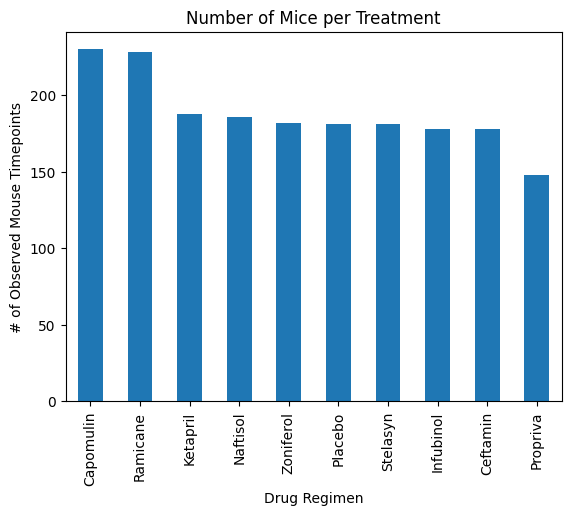

In [156]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
tx_count = study_data_clean['Drug Regimen'].value_counts()

tx_plot = tx_count.plot.bar()

# set the title, x & y labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Number of Mice per Treatment')
plt.show()


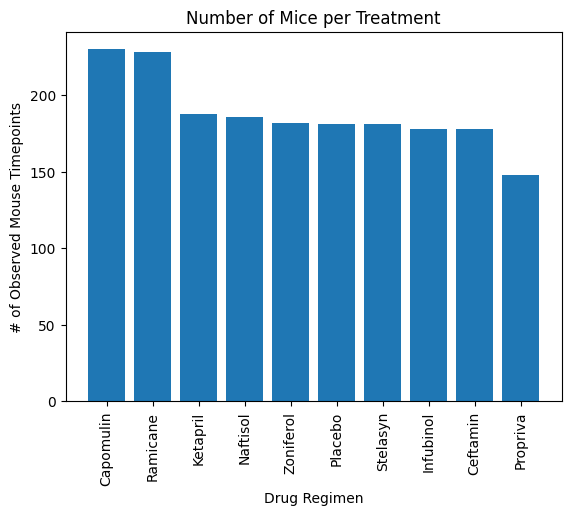

In [157]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = tx_count.index.values
y_axis = tx_count.values

#create a pyplot bar plot
plt.bar(x_axis, y_axis, align='center')

# set the title, x & y labels
plt.title('Number of Mice per Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()

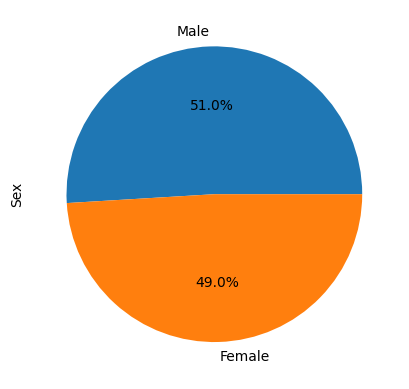

In [158]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mice = study_data_clean['Sex'].value_counts()
# sex_mice

sex_mice.plot.pie(autopct= "%1.1f%%")
plt.show()


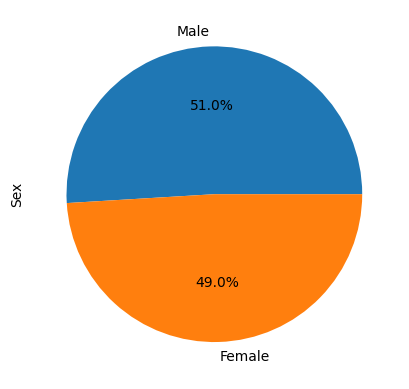

In [159]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
sizes  =[49.7999197, 50.200803]
plot = sex_mice.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [160]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = study_data_clean.groupby('Mouse ID')['Timepoint'].max()
last_tp = last_tp.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tvolume_last_tp = last_tp.merge(study_data_clean, how='left', on=['Mouse ID', 'Timepoint'])
tvolume_last_tp

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [161]:
# Put treatments into a list for for loop (and later for plot labels)
tx_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tvolume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for tx in tx_list:
    tvolume_1 = tvolume_last_tp.loc[tvolume_last_tp['Drug Regimen'] == tx, 'Tumor Volume (mm3)']
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    tvolume_data.append(tvolume_1)
    
    # Determine outliers using upper and lower bounds
    # Calculate IQR
    tvolume_quartiles = tvolume_1.quantile([.25,.5,.75])
    tvolume_lowerq = tvolume_quartiles[0.25] 
    tvolume_upperq = tvolume_quartiles[0.75]
    iqr = tvolume_upperq-tvolume_lowerq


    tvolume_lower_bound = tvolume_lowerq - (1.5*iqr)
    tvolume_upper_bound = tvolume_upperq + (1.5*iqr)

    print(f"{tx}'s potential outliers: Values below {tvolume_lower_bound} could be outliers. Values above {tvolume_upper_bound} could be outliers.")



Capomulin's potential outliers: Values below 20.70456164999999 could be outliers. Values above 51.83201549 could be outliers.
Ramicane's potential outliers: Values below 17.912664470000003 could be outliers. Values above 54.30681135 could be outliers.
Infubinol's potential outliers: Values below 36.83290494999999 could be outliers. Values above 82.74144559000001 could be outliers.
Ceftamin's potential outliers: Values below 25.355449580000002 could be outliers. Values above 87.66645829999999 could be outliers.


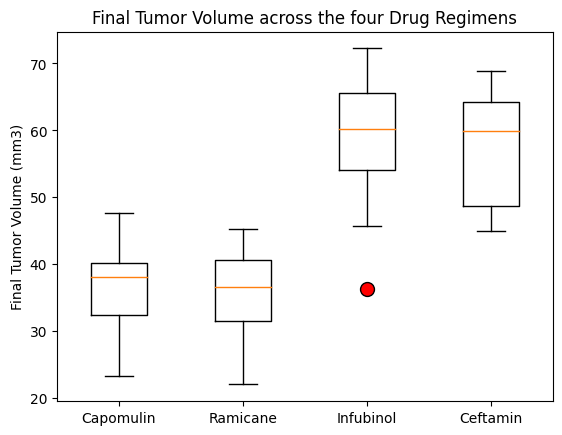

In [162]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red', markersize=10)

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume across the four Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tvolume_data, flierprops=flierprops, labels=tx_list)

plt.show()

## Line and Scatter Plots

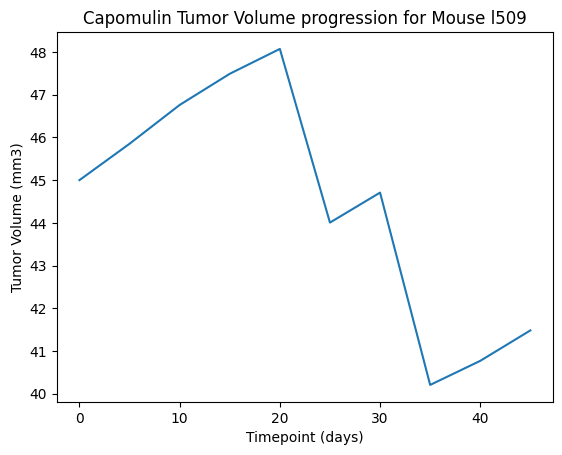

In [163]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#isolate mouse I509
capomulin_mousel509 = study_data_clean.loc[study_data_clean['Mouse ID'] == 'l509']

# plot it
plt.plot(capomulin_mousel509['Timepoint'], capomulin_mousel509['Tumor Volume (mm3)'])
plt.title('Capomulin Tumor Volume progression for Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


In [164]:
#testing dataframe
capomulin_mousel509.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


C:\Users\alvar\AppData\Local\Temp\ipykernel_27172\1027331379.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_tvolume_cap = capomulin_mice.groupby(['Mouse ID']).mean()


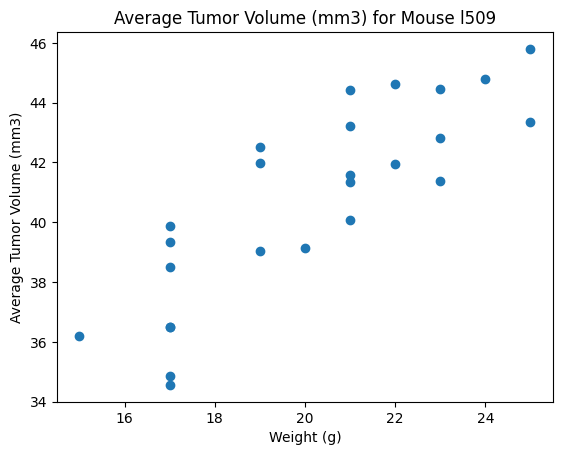

In [165]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_mice = study_data_clean.loc[study_data_clean['Drug Regimen']=='Capomulin']

#calculate avg tvolume
avg_tvolume_cap = capomulin_mice.groupby(['Mouse ID']).mean()

#plot it by calling on Weight and volume points in the last variable
plt.scatter(avg_tvolume_cap['Weight (g)'], avg_tvolume_cap['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume (mm3) for Mouse l509')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


In [166]:
#teasting dataframe
capomulin_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


## Correlation and Regression

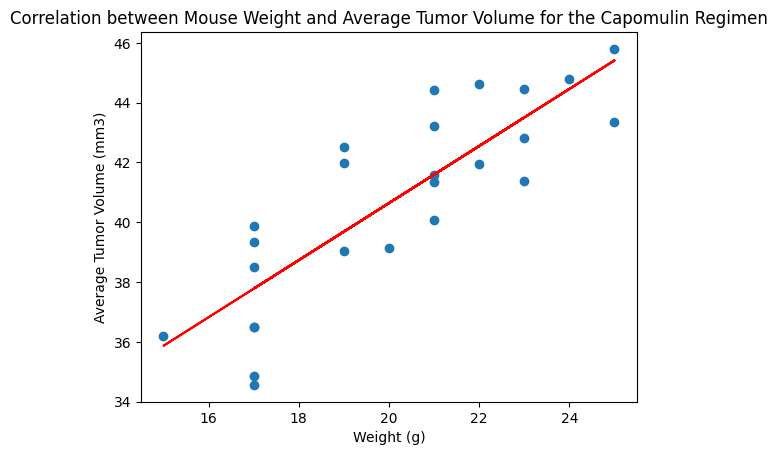

In [167]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = avg_tvolume_cap['Weight (g)']
y_values = avg_tvolume_cap['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.title('Correlation between Mouse Weight and Average Tumor Volume for the Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


